In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/resume_projects/house_pricing_regression/Housing.csv"))

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print(housing.shape)
housing.info()

(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

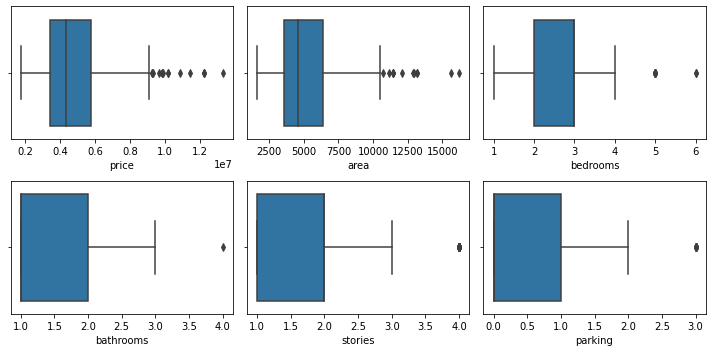

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

In [ ]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

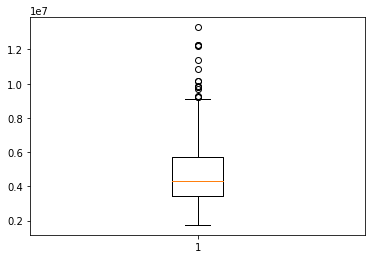

In [ ]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

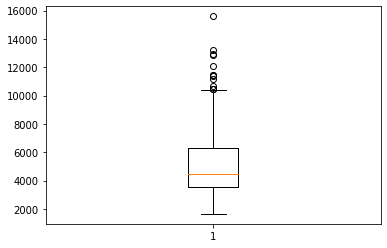

In [ ]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

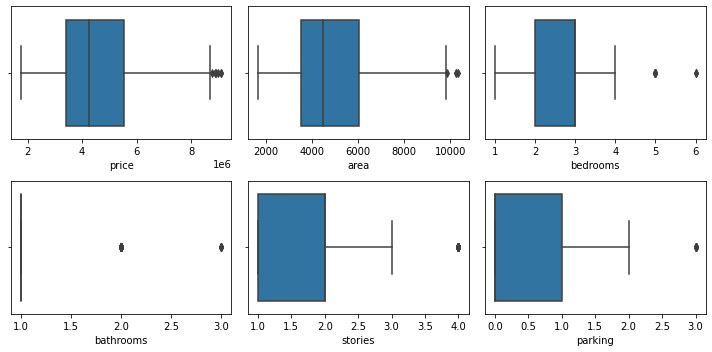

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

Exploratory Data Analytics

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

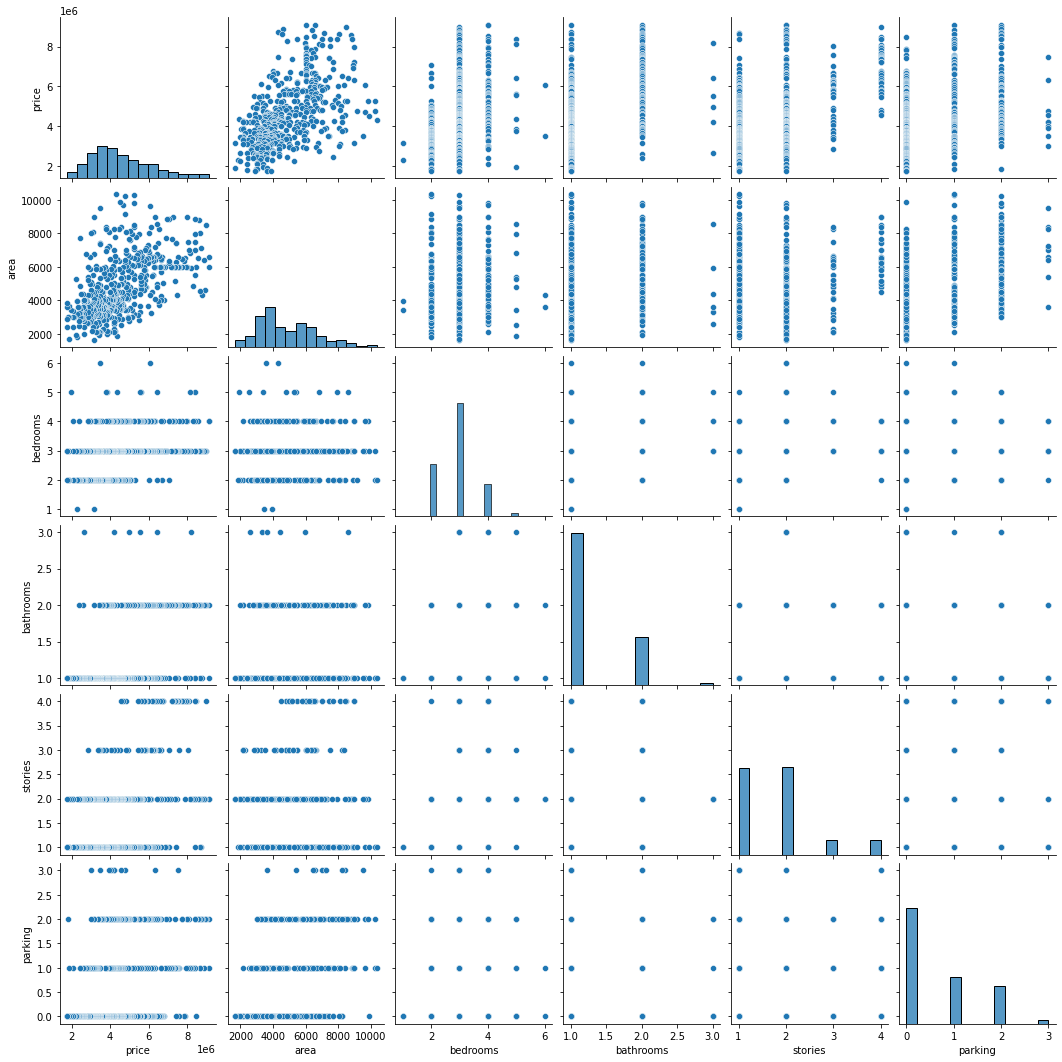

In [ ]:
sns.pairplot(housing)
plt.show()

Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

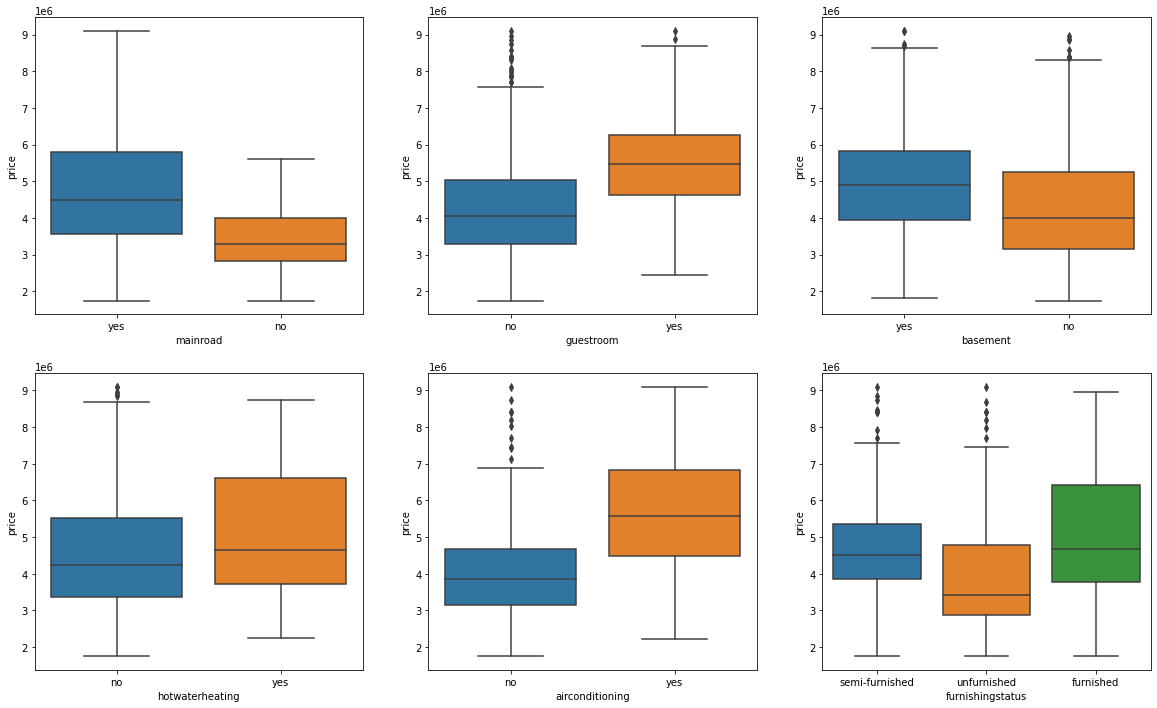

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

Data Preparation

You can see that your dataset has many columns with values as 'Yes' or 'No'.

But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [ ]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

Dummy Variables





The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.


In [ ]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [ ]:
housing = pd.concat([housing, status], axis = 1)

In [ ]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

Splitting the Data into Training and Testing Sets

In [ ]:
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3)

Rescaling the Features

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
print(df_test)

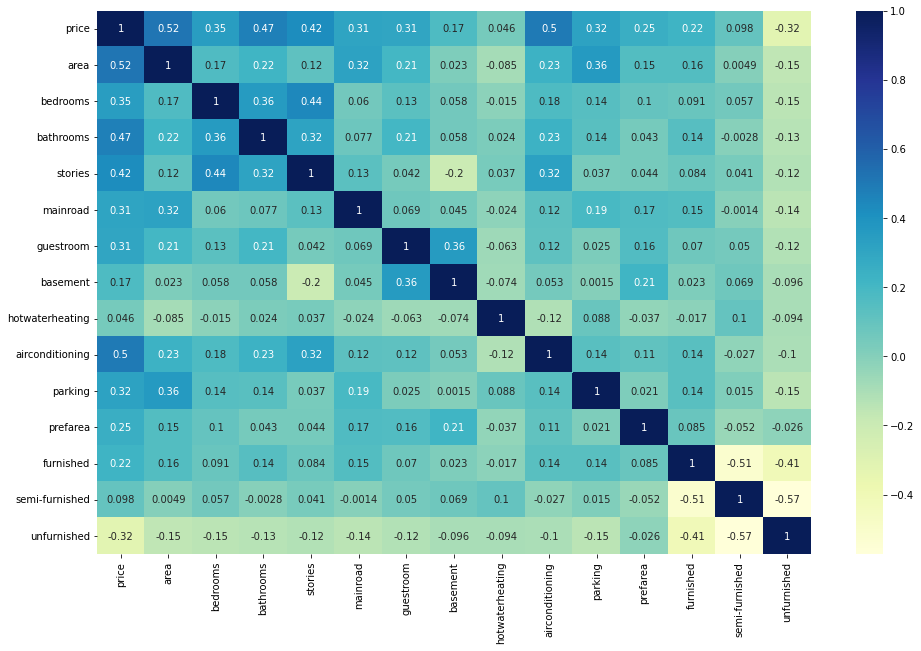

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, area seems to the correlated to price the most. Let's see a pairplot for area vs price

Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

Model Building

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(lm,n_features_to_select= 6)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
print(rfe.ranking_)

[1 7 1 1 6 5 2 1 1 1 4 9 8 3]


In [ ]:
col = X_train.columns[rfe.support_]
print(col)

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'parking'],
      dtype='object')


In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
reg = LinearRegression().fit(X_train_rfe, y_train)

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

          Features   VIF
0             area  2.70
2          stories  2.08
5          parking  1.84
4  airconditioning  1.72
1        bathrooms  1.52
3  hotwaterheating  1.07


Model Evaluation

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
X_test_rfe = X_test[X_train_rfe.columns]

In [ ]:
y_pred =reg.predict(X_test_rfe)

In [ ]:
r2_score(y_test, y_pred)

0.6082798483557178